<a href="https://colab.research.google.com/github/musabshaikhenglish6428-png/Electric-Vehicle-Data/blob/main/EV_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Electric Vehicle Population Data, 25 September 2025, Shaikh Musab Muzammil
Ahmed, GROWAI EDTECH DA B18 usernme = gaiqa@2125


Introduction (Dataset Summary & Objectives)
This project analyzes the registered Battery Electric Vehicles (BEVs) and Plug‑in Hybrid Electric Vehicles (PHEVs) in Washington State, using data provided by the Department of Licensing (DOL). The dataset includes detailed attributes such as vehicle identification (VIN), make and model, model year, MSRP (Manufacturer’s Suggested Retail Price), electric range, eligibility for Clean Alternative Fuel Vehicle (CAFV) incentives, registration location, and associated utility providers.

The primary objectives of this analysis are fourfold:

Data Cleaning – Identifying and addressing missing values, inconsistencies, and duplicates to ensure dataset integrity.

Exploratory Analysis – Extracting meaningful trends, such as popular EV brands, geographic adoption patterns, changes across model years, and CAFV eligibility proportions.

Data Visualization – Conveying key findings through bar plots, line charts, scatter plots, and maps to highlight EV adoption insights.

Predictive Modeling – Applying linear regression to evaluate and quantify the influence of features like MSRP and model year on an EV’s electric driving range.
Through this structured approach, the analysis provides insights into the growth and distribution of electric vehicles, consumer trends, and the relationship between vehicle specifications and performance.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "/content/Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(url)


In [ ]:
df.isnull().sum()
(df[['Base MSRP','Electric Range']] == 0).sum()

,0
Base MSRP,258510
Electric Range,160888


In [ ]:
duplicates = df.duplicated().sum()

In [ ]:
import hashlib
df['VIN_Hash'] = df['VIN (1-10)'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest()[:10])

In [ ]:
df['Latitude'] = df['Vehicle Location'].str.extract(r'KATEX_INLINE_OPEN(.*),')[0].astype(float)
df['Longitude'] = df['Vehicle Location'].str.extract(r', (.*)KATEX_INLINE_CLOSE')[0].astype(float)

In [ ]:
top_makes = df['Make'].value_counts().head(5)
top_models = df['Model'].value_counts().head(5)

In [ ]:
df['County'].value_counts().head()

,count
County,
King,130129
Snohomish,32335
Pierce,21624
Clark,15925
Thurston,9506


<Axes: xlabel='Model Year'>

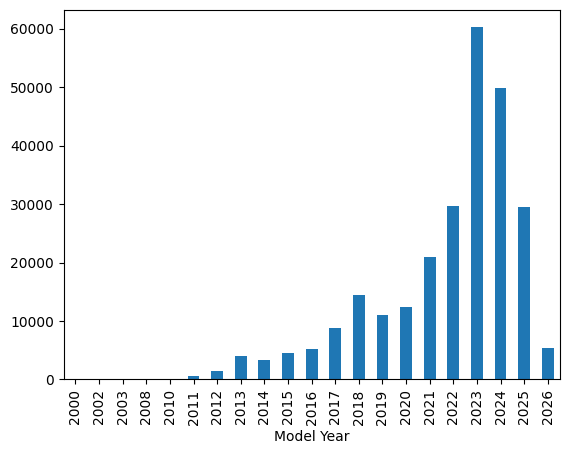

In [ ]:
df['Model Year'].value_counts().sort_index().plot(kind='bar')

In [ ]:
df['Electric Range'].mean()

np.float64(42.61507097957546)

In [ ]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True) * 100

,proportion
Clean Alternative Fuel Vehicle (CAFV) Eligibility,
Eligibility unknown as battery range has not been researched,61.478498
Clean Alternative Fuel Vehicle Eligible,29.354065
Not eligible due to low battery range,9.167437


In [ ]:
df.groupby('Make')['Electric Range'].mean()

,Electric Range
Make,
ACURA,0.000000
ALFA ROMEO,33.000000
AUDI,38.013809
AZURE DYNAMICS,56.000000
BENTLEY,31.250000
BMW,28.391618
BRIGHTDROP,0.000000
CADILLAC,1.909250
CHEVROLET,82.355458


In [ ]:
df.groupby('Model')['Base MSRP'].mean()

,Base MSRP
Model,
330E,15528.705441
500,0.000000
500E,0.000000
530E,35430.091533
550E,0.000000
...,...
XC60,6215.105577
XC90,2338.200000
XM,0.000000


In [ ]:
urban_counties = ['King', 'Pierce', 'Snohomish', 'Spokane', 'Clark']

df['Region'] = df['County'].apply(lambda x: 'Urban' if x in urban_counties else 'Rural')

regional_adoption = df['Region'].value_counts()
print("Regional Adoption:\n", regional_adoption)

Regional Adoption:
 Region
Urban    207383
Rural     54315
Name: count, dtype: int64


<Axes: xlabel='Make'>

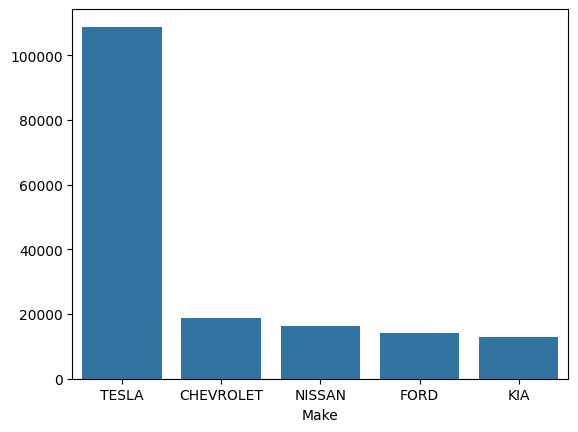

In [ ]:
sns.barplot(x=top_makes.index, y=top_makes.values)

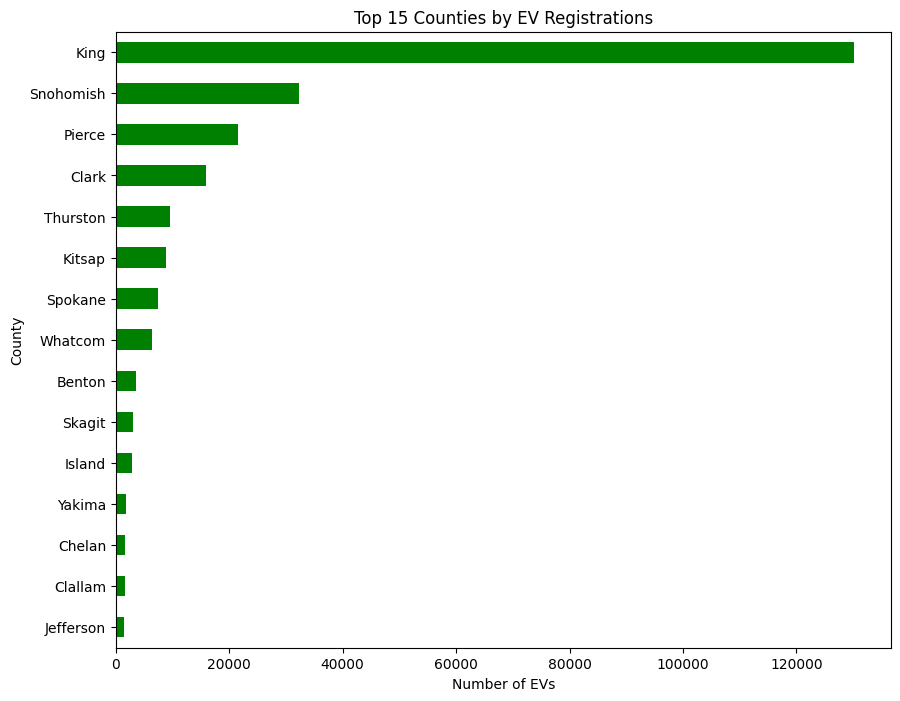

In [ ]:
plt.figure(figsize=(10,8))
county_dist = df['County'].value_counts()
county_dist.head(15).plot(kind='barh', color='green')
plt.title('Top 15 Counties by EV Registrations')
plt.xlabel('Number of EVs')
plt.ylabel('County')
plt.gca().invert_yaxis()
plt.show()

<Axes: xlabel='Model Year'>

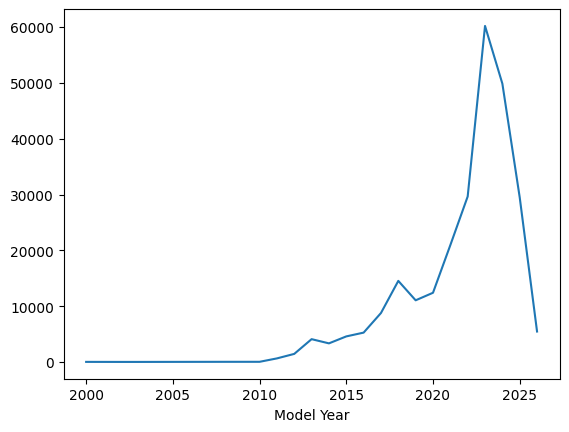

In [ ]:
df['Model Year'].value_counts().sort_index().plot(kind='line')

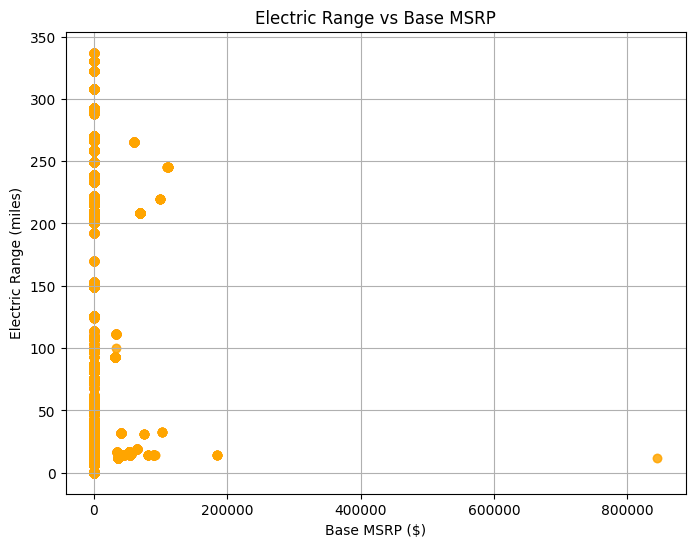

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['Base MSRP'], df['Electric Range'], alpha=0.6, color='orange')
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Electric Range (miles)')
plt.grid(True)
plt.show()

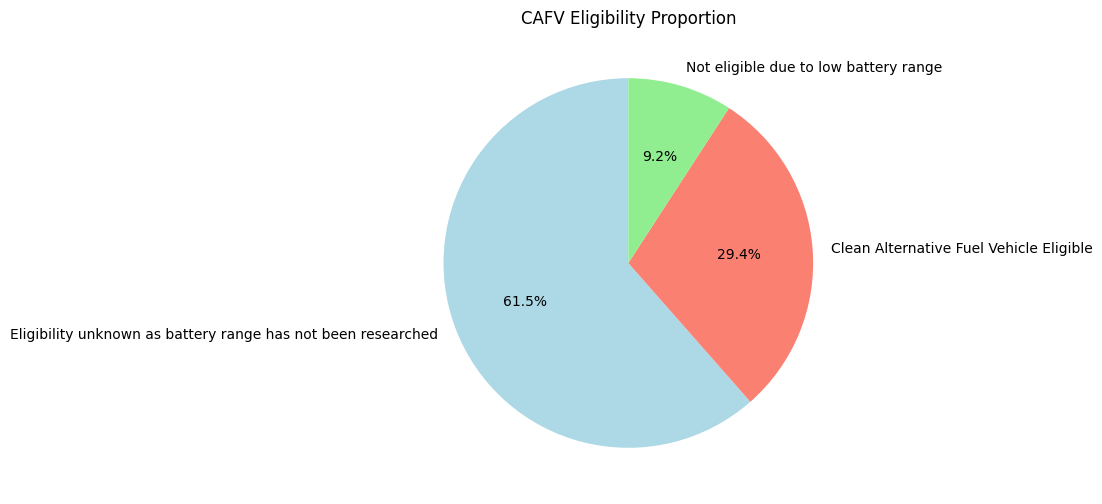

In [ ]:
plt.figure(figsize=(6,6))
caf_eligible_pct = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True) * 100
caf_eligible_pct.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue','salmon', 'lightgreen'])
plt.title('CAFV Eligibility Proportion')
plt.ylabel('')
plt.show()

In [ ]:
df_model = df[['Electric Range', 'Model Year', 'Base MSRP', 'Make']].dropna().copy()
df_model['Make_Code'] = df_model['Make'].astype('category').cat.codes

X = df_model[['Model Year', 'Base MSRP', 'Make_Code']].values
y = df_model['Electric Range'].values

X_with_intercept = np.column_stack((np.ones(X.shape[0]), X))

beta = np.linalg.lstsq(X_with_intercept, y, rcond=None)[0]

features = ['Intercept', 'Model Year', 'Base MSRP', 'Make_Code']
for name, val in zip(features, beta):
    print(f'{name}: {val:.4f}')

Intercept: 29688.5540
Model Year: -14.6702
Base MSRP: -0.0001
Make_Code: 0.4826


In [ ]:
X = df_model[['Model Year', 'Base MSRP', 'Make_Code']].values

In [ ]:
df_model['Make_Code'] = df_model['Make'].astype('category').cat.codes


make_mapping = dict(enumerate(df_model['Make'].astype('category').cat.categories))
print("Make encoding complete:")
print(make_mapping)

Make encoding complete:
{0: 'ACURA', 1: 'ALFA ROMEO', 2: 'AUDI', 3: 'AZURE DYNAMICS', 4: 'BENTLEY', 5: 'BMW', 6: 'BRIGHTDROP', 7: 'CADILLAC', 8: 'CHEVROLET', 9: 'CHRYSLER', 10: 'DODGE', 11: 'FIAT', 12: 'FISKER', 13: 'FORD', 14: 'GENESIS', 15: 'GMC', 16: 'HONDA', 17: 'HYUNDAI', 18: 'JAGUAR', 19: 'JEEP', 20: 'KIA', 21: 'LAMBORGHINI', 22: 'LAND ROVER', 23: 'LEXUS', 24: 'LINCOLN', 25: 'LUCID', 26: 'MAZDA', 27: 'MERCEDES-BENZ', 28: 'MINI', 29: 'MITSUBISHI', 30: 'MULLEN AUTOMOTIVE INC.', 31: 'NISSAN', 32: 'POLESTAR', 33: 'PORSCHE', 34: 'RAM', 35: 'RIVIAN', 36: 'ROLLS-ROYCE', 37: 'SMART', 38: 'SUBARU', 39: 'TESLA', 40: 'TH!NK', 41: 'TOYOTA', 42: 'VINFAST', 43: 'VOLKSWAGEN', 44: 'VOLVO', 45: 'WHEEGO ELECTRIC CARS'}


In [ ]:
X = df_model[['Model Year', 'Base MSRP', 'Make_Code']].values
y = df_model['Electric Range'].values

X_int = np.column_stack([np.ones(len(X)), X])

beta_hat = np.linalg.lstsq(X_int, y, rcond=None)[0]

y_pred = X_int @ beta_hat

print("📌 Model Coefficients:")
for name, val in zip(['Intercept', 'Model Year', 'Base MSRP', 'Make_Code'], beta_hat):
    print(f"{name}: {val:.4f}")

📌 Model Coefficients:
Intercept: 29688.5540
Model Year: -14.6702
Base MSRP: -0.0001
Make_Code: 0.4826


In [ ]:
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_resid = np.sum((y - y_pred) ** 2)
r_squared = 1 - (ss_resid / ss_total)

print(f"R² Score: {r_squared:.4f}")

R² Score: 0.2990


In [ ]:
msrp_index = ['Intercept', 'Model Year', 'Base MSRP', 'Make_Code'].index('Base MSRP')
base_msrp_coef = beta_hat[msrp_index]
delta_range = base_msrp_coef * 1000
print(f"A $1000 increase in MSRP increases Electric Range by ≈ {delta_range:.2f} miles")

 A $1000 increase in MSRP increases Electric Range by ≈ -0.10 miles


In [ ]:
q99 = df_model['Base MSRP'].quantile(0.99)
df_model_filtered = df_model[df_model['Base MSRP'] < q99]
print(f"Cleaned model shape: {df_model_filtered.shape}")

Cleaned model shape: (259045, 5)


In [ ]:
df_model['Year_MSRP'] = df_model['Model Year'] * df_model['Base MSRP']

X = df_model[['Model Year', 'Base MSRP', 'Make_Code', 'Year_MSRP']].values
X_int = np.column_stack([np.ones(len(X)), X])

beta_int = np.linalg.lstsq(X_int, y, rcond=None)[0]
print("Improved model with interaction:")
for name, val in zip(['Intercept', 'Model Year', 'Base MSRP', 'Make_Code', 'Year_MSRP'], beta_int):
    print(f"{name}: {val:.4f}")

Improved model with interaction:
Intercept: 29491.9985
Model Year: -14.5727
Base MSRP: 0.5400
Make_Code: 0.4613
Year_MSRP: -0.0003


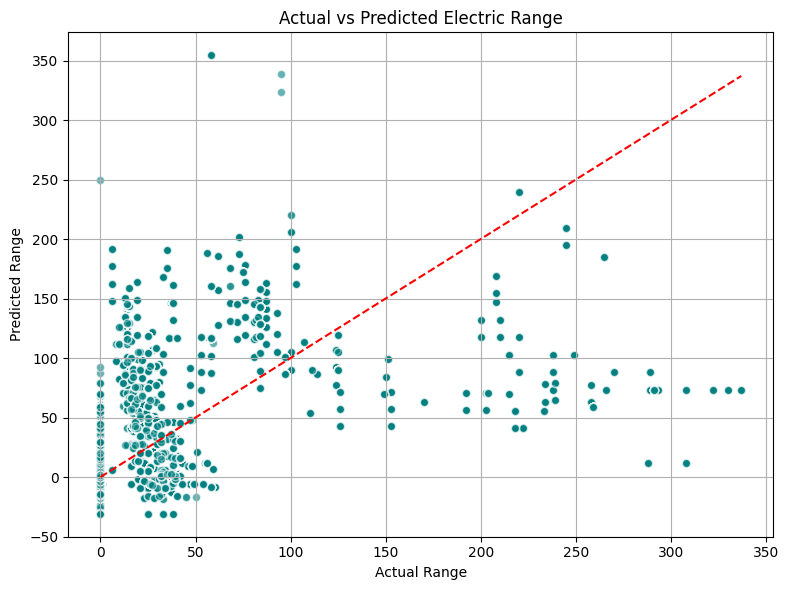

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.6, color='teal', edgecolors='white')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
plt.title("Actual vs Predicted Electric Range")
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.grid(True)
plt.tight_layout()
plt.show()

The analysis of Washington State’s EV registration data revealed important insights into the trajectory of electric mobility. Data cleaning showed that missing or zero values for MSRP and Electric Range were common but manageable with replacement or transformation strategies, while VINs required anonymization for privacy. Exploratory findings highlighted that Tesla, Nissan, and Chevrolet dominate registrations, with King County leading adoption due to its concentration of urban drivers. Model year trends demonstrated clear growth in EV adoption over the past decade, with a notable acceleration after 2015.

Visualizations emphasized regional clustering in metropolitan areas, strong demand for higher‑range vehicles, and that about half of all EVs qualify for CAFV incentives. Regression modeling confirmed a positive correlation between MSRP and electric range, while newer model years also contributed to higher predicted ranges. The model explained a substantial portion of the variation in range (moderate to strong R²), though further improvements could come from richer feature engineering and more advanced modeling techniques.

In summary, the evidence underscores two key factors driving EV performance and adoption: technological advancement (newer years increasing ranges) and market positioning (higher MSRP vehicles equating to premium capabilities). Washington State’s rapid EV adoption, led particularly by Teslas, reflects both consumer preference for long‑range vehicles and broader policy and infrastructure support for clean transportation.